# **How many cases of soft drinks Coca-Cola produces to supply the demand of the Guadalajara Metropolitan area?**

Anna Paola DG 
Evidence 2

## **Introduction**


### **Time Series Analysis**
Time series analysis is a statistical technique used to analyze a sequence of data points collected over time. This method involves recording data at consistent intervals to identify `patterns`, `trends`, and `seasonal` variations within the dataset (Tableau, 2024). By examining these temporal sequences, analysts can make informed `predictions` and decisions based on historical data in various fields, including economics, finance, and supply chain management, where understanding past behaviors can help forecast future outcomes (sigma, 2024).  

\

In the context of Coca-Cola’s production to meet the demand in the Guadalajara Metropolitan area, time series analysis can be instrumental. By analyzing historical sales data, the company can identify trends and seasonal patterns in soft drink consumption. This information can then be used to optimize production schedules, ensuring that supply meets demand efficiently and cost-effectively.


### **The Importance of Stationary**

Stationarity is crucial in time series analysis because it ensures that the statistical properties of the series, such as `mean, variance, and autocovariance`, remain `constant` over time (HEX TECH, 2023). Many time series models, including ARIMA and SARIMA, assume stationarity to provide accurate and reliable forecasts (Timescale, 2024)

\

In practical terms, stationarity allows analysts to make meaningful inferences and predictions based on historical data. For instance, in the context of forecasting Coca-Cola’s production to meet demand in the Guadalajara Metropolitan area, ensuring that the sales data is stationary would lead to more reliable and actionable insights.

### **Business Intelligence Usefullness**

Time series analysis is highly valuable for business intelligence as it enables organizations to understand and predict trends, patterns, and seasonal variations in their data. By analyzing historical data, businesses can make informed decisions, optimize operations, and enhance strategic planning. For instance, time series analysis can help companies forecast sales, manage inventory, and allocate resources more efficiently.

## **Description of the Problem Situation**

The challenge revolves around determining how many cases of soft drinks Coca-Cola needs to produce to meet the demand in the Guadalajara Metropolitan area. Arca Continental Coca-Cola, a major bottling company serving over 118 million consumers across multiple countries, aims to optimize its production to satisfy consumer needs at competitive prices. To address this problem, a comprehensive approach involving the analysis of historical sales data and the application of various forecasting methods is required. This process includes a thorough review of the company's data and the development of a predictive model. The ultimate goal is to generate accurate sales forecasts in boxes for the Guadalajara Metropolitan Area, thereby aiding strategic decision-making.

## **Data and Methodology**

In [70]:
# Errors
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [3]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00


In [71]:
# Loading Required Libraries

import numpy as np  # Operate math function on arrays
import pandas as pd  # Data structures and data analysis tools
import matplotlib.pyplot as plt  # Plots
import seaborn as sns  # Statistical Graphics
import itertools  # Iterartors
from statsmodels.graphics.tsaplots import plot_acf  # Autocorrelation Plotting
from statsmodels.tsa.stattools import adfuller as adft  # Stationarity Test
from statsmodels.tsa.stattools import grangercausalitytests  # Granger Causality Test
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposes a time series into trend, seasonal, and residual components
import matplotlib.dates as mdates  # Handling Dates
from datetime import datetime  # Date and Time Manipulation
from matplotlib.pylab import rcParams  # Matplotlib customization.
import pmdarima as pm  # ARIMA and seasonal decomposition.
from statsmodels.tsa.arima.model import ARIMA  # Forecasting
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.api import qqplot  # Compare the distribution of a dataset
import statsmodels.api as sm  # Statistical Model Estimation
from statsmodels.tsa.api import VAR  # Vector AutoRegression (VAR)
from sklearn.metrics import mean_squared_error  # Mean Squared Error
from statsmodels.stats.diagnostic import acorr_ljungbox # Serial Autocorrelation
import pickle
%matplotlib inline
plt.style.use('seaborn-darkgrid')
!pip install pmdarima --quiet

In [5]:
# Importing dataset
from google.colab import files
uploaded = files.upload()

Saving cocacolasales.xlsx to cocacolasales.xlsx


In [72]:
# Importing dataset as an object in the environment
df = pd.read_excel('cocacolasales.xlsx', sheet_name='cocacolasalesboxes')

In [73]:
# Define a function to transform the date
def transform_date(date):
    year = date.day + 2000  # Extract day and add 2000 to get the year
    month = date.month
    return pd.Timestamp(year=year, month=month, day=1)

# Apply the transformation to the 'tperiod' column
df['tperiod'] = df['tperiod'].apply(transform_date)

In [74]:
# Convert the 'tperiod' column to datetime64 datatype
df['tperiod'] = pd.to_datetime(df['tperiod'])

# Set the 'tperiod' column as the index
df.set_index('tperiod', inplace=True)

print(df.head())

            sales_unitboxes  consumer_sentiment        CPI  inflation_rate  \
tperiod                                                                      
2015-01-01      5516689.143           38.062504  87.110103           -0.09   
2015-02-01      5387496.113           37.491143  87.275377            0.19   
2015-03-01      5886746.634           38.505219  87.630717            0.41   
2015-04-01      6389182.011           37.842864  87.403840           -0.26   
2015-05-01      6448274.629           38.031692  86.967366           -0.50   

            unemp_rate  gdp_percapita       itaee  itaee_growth  pop_density  \
tperiod                                                                        
2015-01-01    0.052303    11659.55571  103.765354      0.049717    98.541847   
2015-02-01    0.053113    11659.55423  103.765354      0.049717    98.541860   
2015-03-01    0.046088    11659.55275  103.765354      0.049717    98.541872   
2015-04-01    0.051020    11625.74515  107.751835    

### *Time Series Plot*

The decomposition time series plot consists of four graphs: the original time series, which shows the raw data with noticeable fluctuations; the trend component, which reveals a general upward trend indicating increasing sales over time; the seasonal component, which displays consistent peaks and troughs, highlighting a repeating pattern or seasonality per year; and the residual component, which captures the irregular fluctuations remaining.

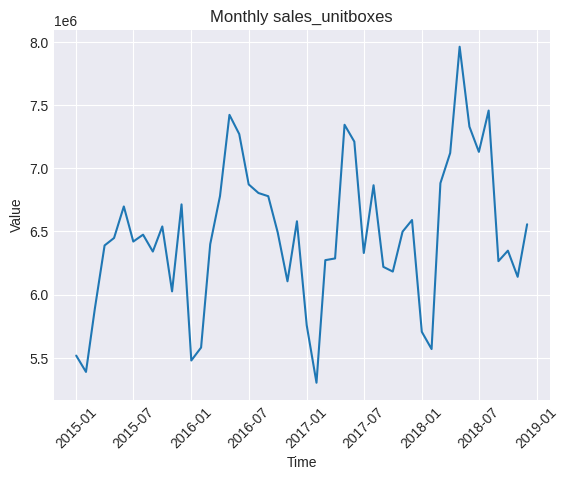

In [75]:
# Time Series Plot
date_range = pd.date_range('2015-01-01', '2018-12-01', freq='MS')
fsp = df['sales_unitboxes']
data = {'tperiod': date_range, 'sales_unitboxes': fsp}
df2 = pd.DataFrame(data)

# Create the plot
plt.plot(df2['tperiod'], df2['sales_unitboxes'], linestyle = 'solid')

# Add title and axis labels
plt.title('Monthly sales_unitboxes')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [76]:
ts_decomposition = sm.tsa.seasonal_decompose(df['sales_unitboxes'], model='additive', period=12)

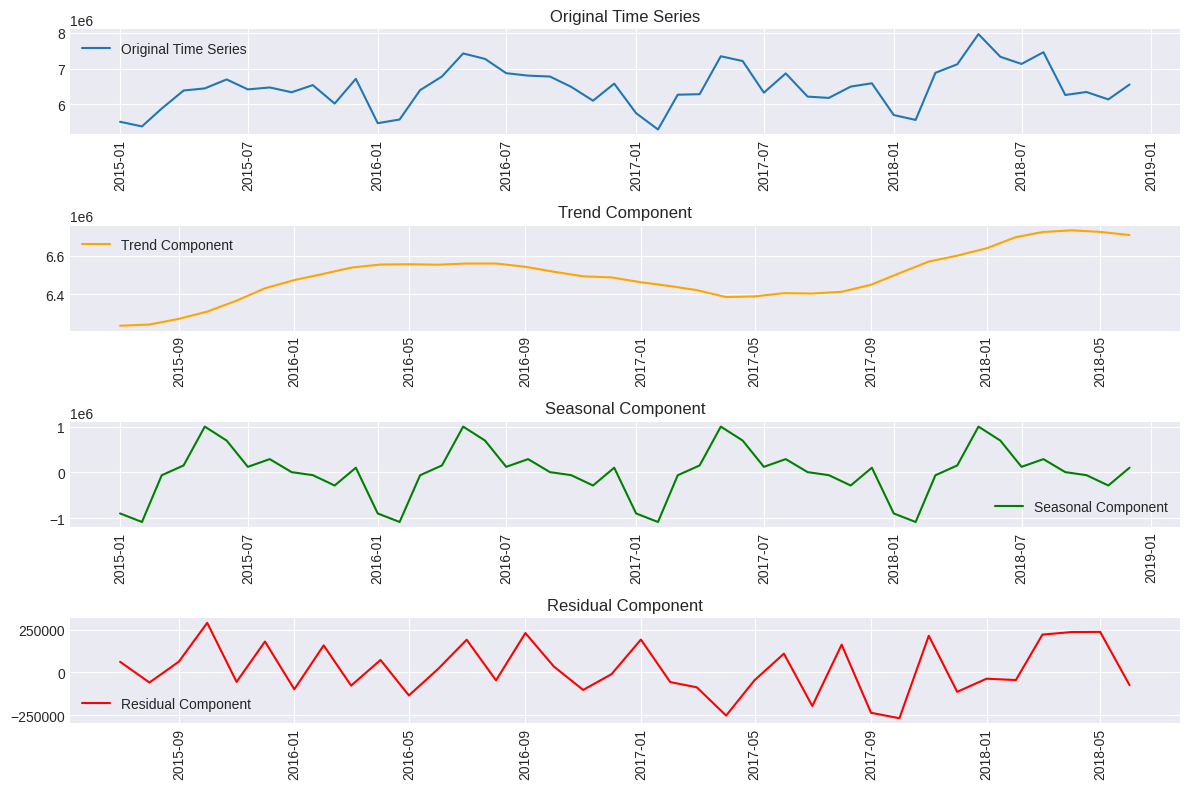

In [77]:
# Plotting time series data decomposition

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['sales_unitboxes'], label='Original Time Series')
plt.title('Original Time Series')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 2)
plt.plot(ts_decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 3)
plt.plot(ts_decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 4)
plt.plot(ts_decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### *Stationarity*

In [78]:
### Augment Dickey Fuller Test - Stationary Test
### Accept H1: Time series is stationary

adf_test = adft(df['sales_unitboxes'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.868967
p-value: 0.002275


### *Serial Autocorrelation*

In [79]:
### Perform Ljung-Box test
### H1: sales_unitboxes shows significant autocorrelation (past values have a strong influence on future values)

lb_test = acorr_ljungbox(df['sales_unitboxes'], lags=[40])  # Recommended to seeing a year's worth of seasonality

print('Ljung-Box test p-value:', lb_test['lb_pvalue'].iloc[0])

Ljung-Box test p-value: 1.1542286827794465e-15


<Figure size 700x500 with 0 Axes>

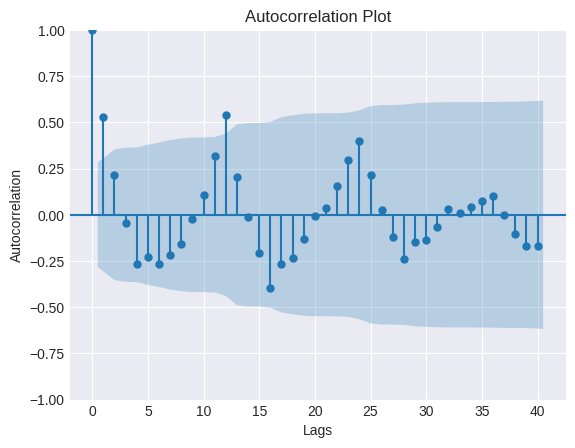

In [80]:
### Autocorrelation Plot -- all but one fall under the confidence interval
plt.figure(figsize=(7,5))
plot_acf(df['sales_unitboxes'], lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

### *Transformation*

In [81]:
# Application of natural log and differencing transformation
## Serial Autocorrelation found, trying to deminish by way of transformation

df['log_sales_unitboxes'] = np.log(df['sales_unitboxes'])
df['log_diff_unitboxes'] = df['log_sales_unitboxes'] - df['log_sales_unitboxes'].shift(1)
df['log_diff_unitboxes'] = df['log_diff_unitboxes'].replace(np.nan, 0)

<Figure size 700x500 with 0 Axes>

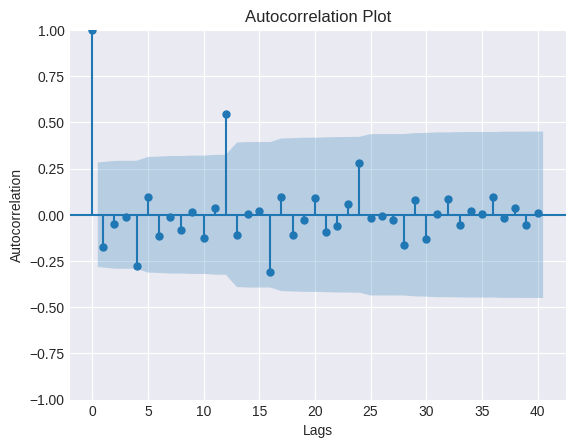

In [82]:
### Autocorrelation Plot
plt.figure(figsize=(7,5))
plot_acf(df['log_diff_unitboxes'], lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

In [83]:
ts_decomposition = sm.tsa.seasonal_decompose(df['log_diff_unitboxes'], model='additive', period=12)

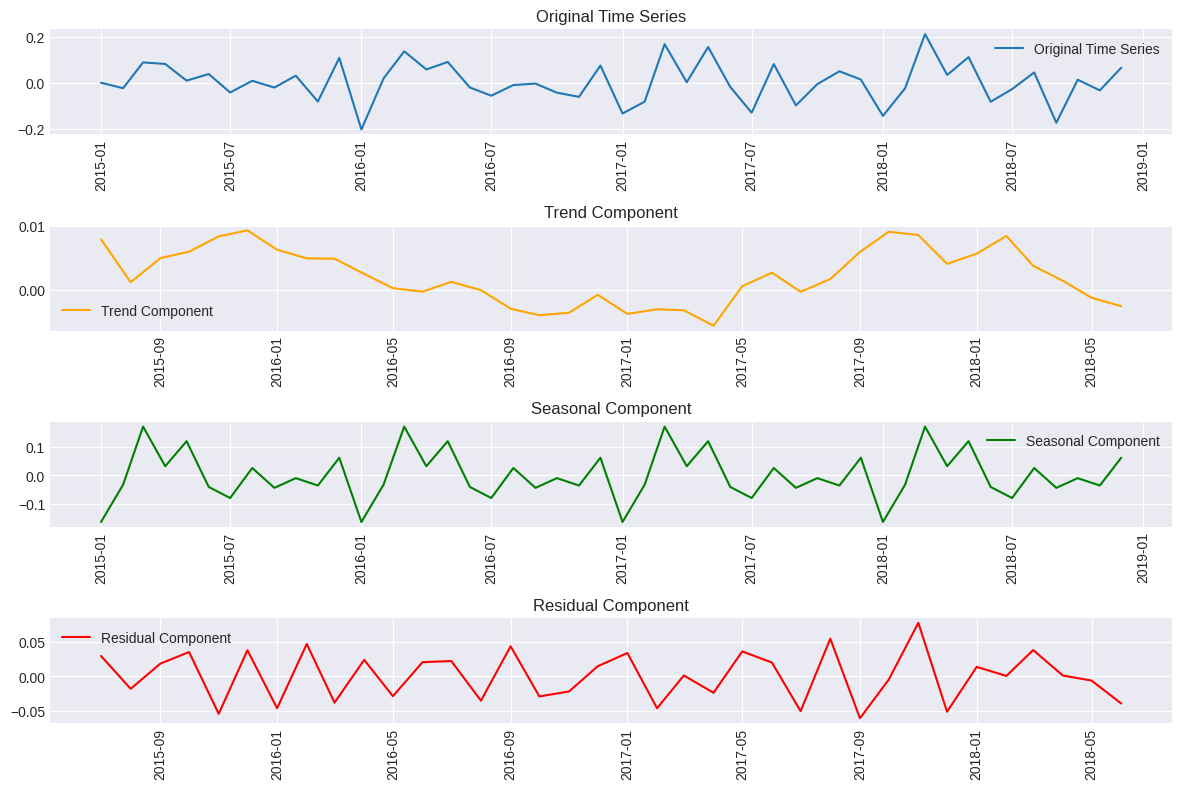

In [84]:
# Plotting time series data decomposition of transformed variable
## Diminished trend while retaining seasonality

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['log_diff_unitboxes'], label='Original Time Series')
plt.title('Original Time Series')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 2)
plt.plot(ts_decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 3)
plt.plot(ts_decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 4)
plt.plot(ts_decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## **Time Series Regression Analysis**

### *Time Series Model 1*

- The `SARIMA model` has been selected for forecasting. It has the lowest AIC value, indicating the best fit among the three models, and all its coefficients are statistically significant.

In [85]:
# Define parameter ranges for each model type
p = range(0, 3)  # Adjusted range for AR terms
d = range(1, 2)  # Differencing order
q = range(0, 3)  # Adjusted range for MA terms
P = D = Q = range(0, 2)  # Seasonal parameters for SARIMA
s = [12]  # Seasonal period for monthly data

# Initialize variables to keep track of best models and their parameters
best_arma_model = None
best_arima_model = None
best_sarima_model = None

best_arma_aic = float('inf')
best_arima_aic = float('inf')
best_sarima_aic = float('inf')

best_arma_params = None
best_arima_params = None
best_sarima_params = None

# ARMA Model Iteration (no differencing, d=0)
for params in itertools.product(p, q):
    try:
        model = ARIMA(df['log_diff_unitboxes'], order=(params[0], 0, params[1])).fit()
        if model.aic < best_arma_aic:
            best_arma_aic = model.aic
            best_arma_model = model
            best_arma_params = params
    except Exception as e:
        continue

# ARIMA Model Iteration
for params in itertools.product(p, d, q):
    try:
        model = ARIMA(df['log_diff_unitboxes'], order=params).fit()
        if model.aic < best_arima_aic:
            best_arima_aic = model.aic
            best_arima_model = model
            best_arima_params = params
    except Exception as e:
        continue

# SARIMA Model Iteration
for params in itertools.product(p, d, q, P, D, Q, s):
    try:
        model = SARIMAX(df['log_diff_unitboxes'], order=params[:3], seasonal_order=params[3:]).fit()
        if model.aic < best_sarima_aic:
            best_sarima_aic = model.aic
            best_sarima_model = model
            best_sarima_params = params
    except Exception as e:
        continue

# Save the best models using pickle
with open('best_arma_model.pkl', 'wb') as f:
    pickle.dump(best_arma_model, f)

with open('best_arima_model.pkl', 'wb') as f:
    pickle.dump(best_arima_model, f)

with open('best_sarima_model.pkl', 'wb') as f:
    pickle.dump(best_sarima_model, f)

In [86]:
# Print the summaries of the loaded models and their parameters
print("ARMA Model Summary:")
print(f"Best ARMA Parameters: (p, q) = {best_arma_params}")
print(f"AIC: {best_arma_aic}")
print(best_arma_model.summary().tables[1])

print("\nARIMA Model Summary:")
print(f"Best ARIMA Parameters: (p, d, q) = {best_arima_params}")
print(f"AIC: {best_arima_aic}")
print(best_arima_model.summary().tables[1])

print("\nSARIMA Model Summary:")
print(f"Best SARIMA Parameters: (p, d, q, P, D, Q, s) = {best_sarima_params}")
print(f"AIC: {best_sarima_aic}")
print(best_sarima_model.summary().tables[1])


ARMA Model Summary:
Best ARMA Parameters: (p, q) = (1, 1)
AIC: -100.05552287854688
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.002      1.586      0.113      -0.001       0.005
ar.L1          0.5437      0.192      2.838      0.005       0.168       0.919
ma.L1         -0.9998     37.430     -0.027      0.979     -74.362      72.362
sigma2         0.0058      0.218      0.027      0.979      -0.421       0.433

ARIMA Model Summary:
Best ARIMA Parameters: (p, d, q) = (0, 1, 1)
AIC: -87.20628801872685
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9962      1.649     -0.604      0.546      -4.227       2.235
sigma2         0.0078      0.013      0.594      0.553      -0.018       0.033

SARIMA Model Summary:
Best SARIMA P

#### Forecast

Forecast Table in Original Scale:
                Forecast      Lower CI      Upper CI
2019-01-01  5.827172e+06  5.221316e+06  6.503328e+06
2019-02-01  5.722567e+06  4.547379e+06  7.201461e+06
2019-03-01  6.744084e+06  4.752704e+06  9.569850e+06
2019-04-01  6.928319e+06  4.330048e+06  1.108570e+07
2019-05-01  7.557151e+06  4.188605e+06  1.363474e+07


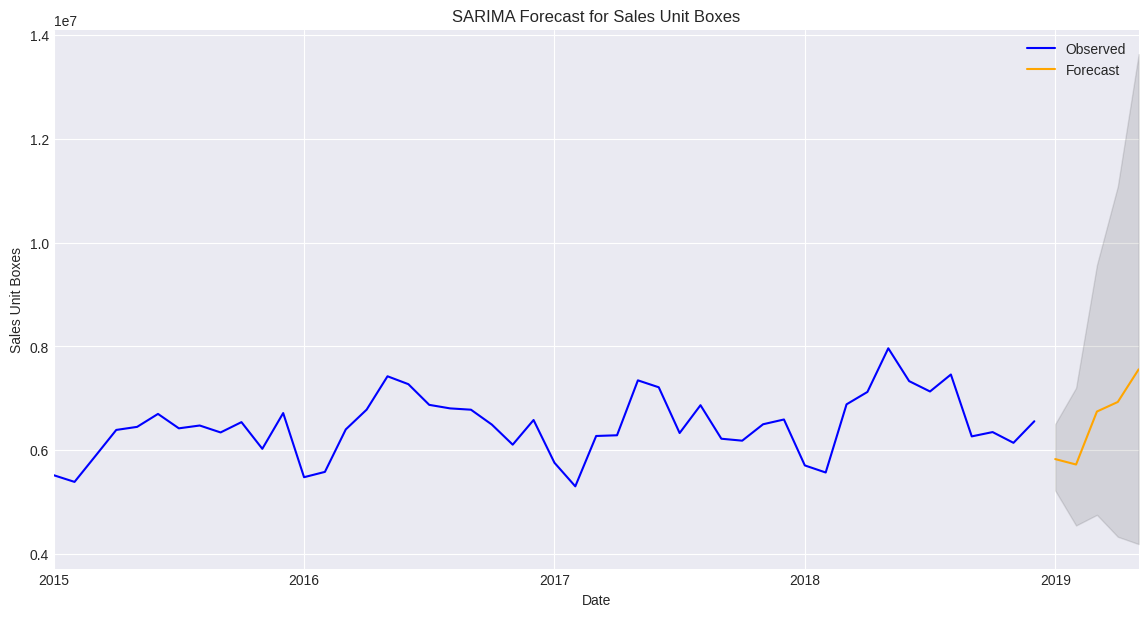

In [87]:
# Forecast the next 5 periods using the SARIMA model fitted on log_diff_unitboxes
forecast_horizon = 5
pred_uc = best_sarima_model.get_forecast(steps=forecast_horizon)

# Get confidence intervals for the forecast
pred_ci = pred_uc.conf_int()

# Reverse the differencing transformation:
# Start from the last known value of log_sales_unitboxes
last_log_value = df['log_sales_unitboxes'].iloc[-1]

# Cumulative sum of the forecasted differences to revert to log scale
forecast_log_values = last_log_value + pred_uc.predicted_mean.cumsum()

# Reverse log transformation to get back to the original sales_unitboxes scale
forecast_original_scale = np.exp(forecast_log_values)

# Reverse the transformation for confidence intervals
lower_log_ci = last_log_value + pred_ci.iloc[:, 0].cumsum()
upper_log_ci = last_log_value + pred_ci.iloc[:, 1].cumsum()

lower_ci_original_scale = np.exp(lower_log_ci)
upper_ci_original_scale = np.exp(upper_log_ci)

# Create a DataFrame for displaying forecast in the original scale
forecast_table = forecast_original_scale.to_frame(name='Forecast')
forecast_table['Lower CI'] = lower_ci_original_scale
forecast_table['Upper CI'] = upper_ci_original_scale

print("Forecast Table in Original Scale:")
print(forecast_table)

# Plot the observed sales and the forecast in the original scale
plt.figure(figsize=(14, 7))

# Plot the observed data
df['sales_unitboxes'].plot(label='Observed', color='blue')

# Plot the forecasted values
forecast_original_scale.plot(label='Forecast', color='orange')

# Plot the confidence intervals
plt.fill_between(forecast_table.index,
                 forecast_table['Lower CI'],
                 forecast_table['Upper CI'],
                 color='k', alpha=0.1)

plt.xlabel('Date')
plt.ylabel('Sales Unit Boxes')
plt.title('SARIMA Forecast for Sales Unit Boxes')
plt.legend()
plt.grid(True)
plt.show()

### *Time Series Model 2*

#### Hypotheses
1. The monthly maximum temperature is positively relevant for predicting unit box sales.  
H1: β3 > 0

2. Inflation Rate is negatively relevant for predicting unit box sales.  
H1: β2 < 0

##### Maximum Temperature

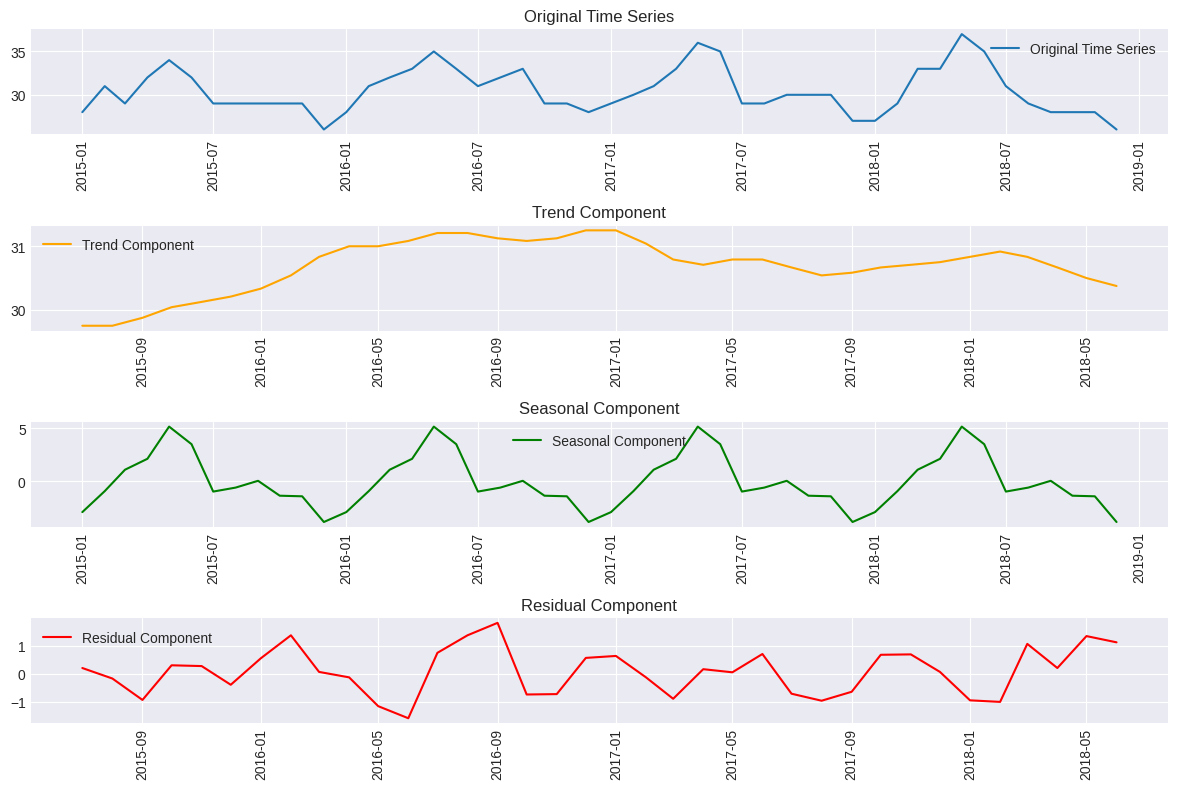

In [88]:
ts_decomposition = sm.tsa.seasonal_decompose(df['max_temperature'], model='additive', period=12)

# Plotting time series data decomposition

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['max_temperature'], label='Original Time Series')
plt.title('Original Time Series')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 2)
plt.plot(ts_decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 3)
plt.plot(ts_decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 4)
plt.plot(ts_decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [89]:
### Augment Dickey Fuller Test - Stationary Test
### Accept H0: Time series is not stationary

adf_test = adft(df['max_temperature'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.824063
p-value: 0.368582


In [90]:
### Perform Ljung-Box test
### H1: max_temperature shows significant autocorrelation (past values have a strong influence on future values)

lb_test = acorr_ljungbox(df['max_temperature'], lags=[40])  # Recommended to seeing a year's worth of seasonality

print('Ljung-Box test p-value:', lb_test['lb_pvalue'].iloc[0])

Ljung-Box test p-value: 4.927502963389102e-27


<Figure size 700x500 with 0 Axes>

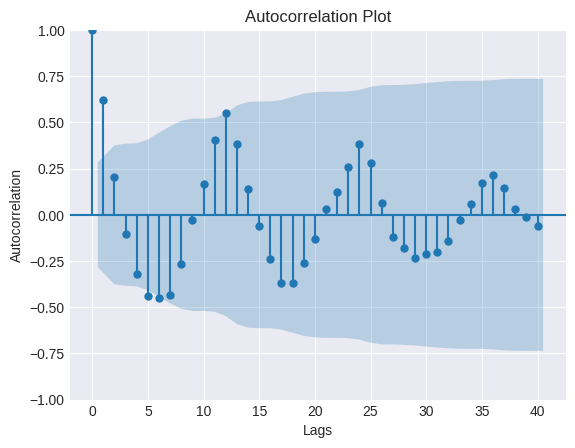

In [91]:
### Autocorrelation Plot
plt.figure(figsize=(7,5))
plot_acf(df['max_temperature'], lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

##### Inflation Rate

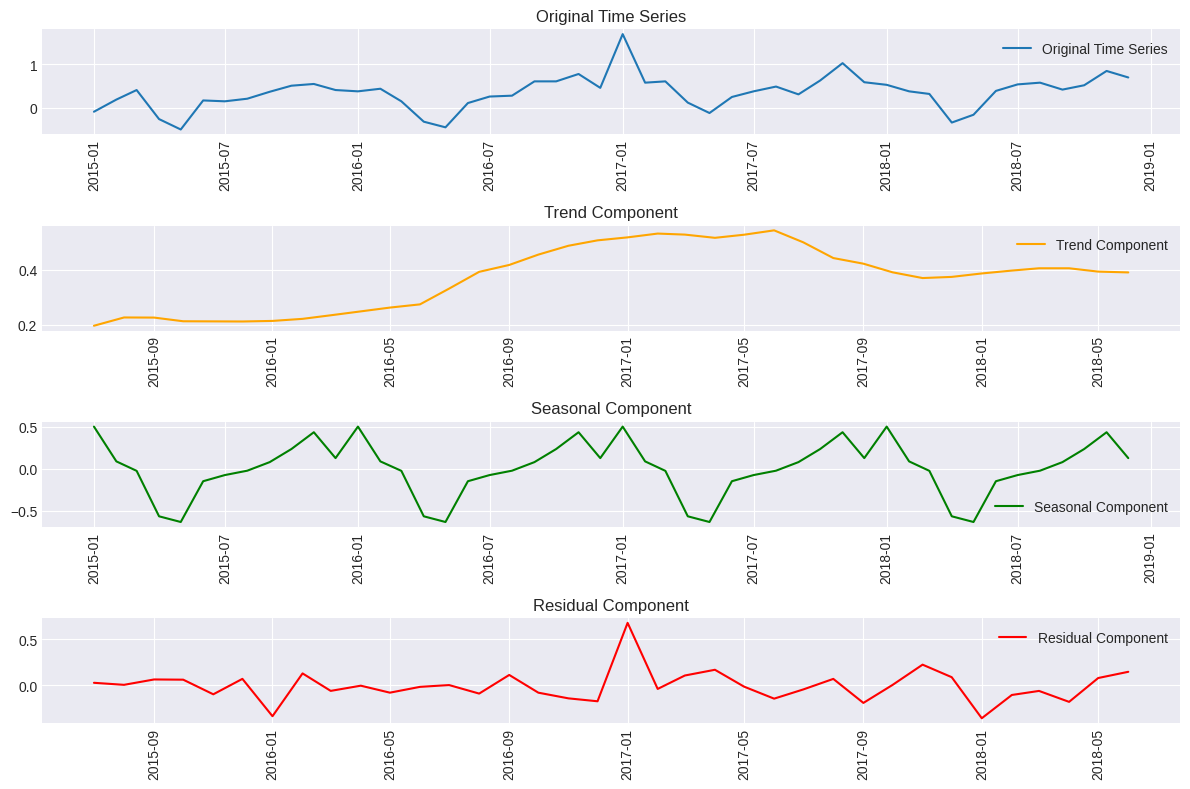

In [92]:
ts_decomposition = sm.tsa.seasonal_decompose(df['inflation_rate'], model='additive', period=12)

# Plotting time series data decomposition

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['inflation_rate'], label='Original Time Series')
plt.title('Original Time Series')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 2)
plt.plot(ts_decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 3)
plt.plot(ts_decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()
plt.xticks(rotation=90)

plt.subplot(4, 1, 4)
plt.plot(ts_decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [93]:
### Augment Dickey Fuller Test - Stationary Test
### Accept H1: Time series is stationary

adf_test = adft(df['inflation_rate'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.840495
p-value: 0.002519


In [94]:
### Perform Ljung-Box test
### H1: inflation_rate shows significant autocorrelation (past values have a strong influence on future values)

lb_test = acorr_ljungbox(df['inflation_rate'], lags=[40])  # Recommended to seeing a year's worth of seasonality

print('Ljung-Box test p-value:', lb_test['lb_pvalue'].iloc[0])

Ljung-Box test p-value: 2.0714817600521893e-09


<Figure size 700x500 with 0 Axes>

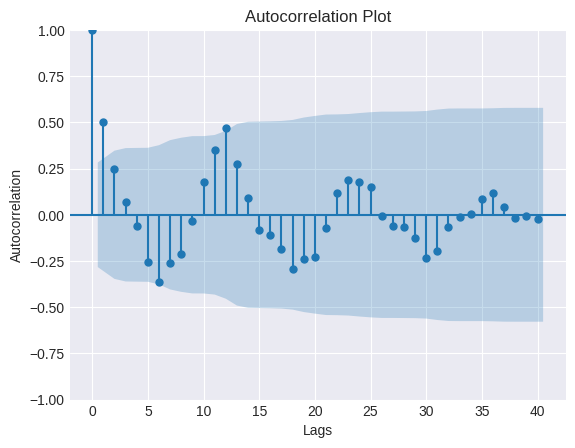

In [95]:
### Autocorrelation Plot -- No statistically
plt.figure(figsize=(7,5))
plot_acf(df['inflation_rate'], lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

##### Tranformation

In [96]:
# Application of natural log and differencing transformation
## max_temperature

df['log_max_temperature'] = np.log(df['max_temperature'])
df['log_diff_temperature'] = df['log_max_temperature'] - df['log_max_temperature'].shift(1)
df['log_diff_temperature'] = df['log_diff_temperature'].replace(np.nan, 0)

## inflation_rate

df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_diff_inflation'] = df['log_inflation_rate'] - df['log_inflation_rate'].shift(1)
df['log_diff_inflation'] = df['log_diff_inflation'].replace(np.nan, 0)

<Figure size 700x500 with 0 Axes>

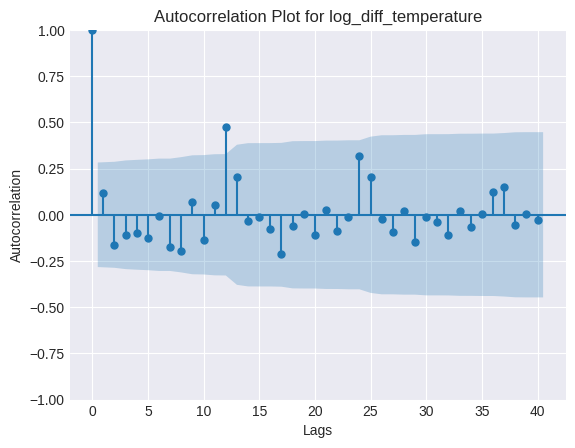

<Figure size 700x500 with 0 Axes>

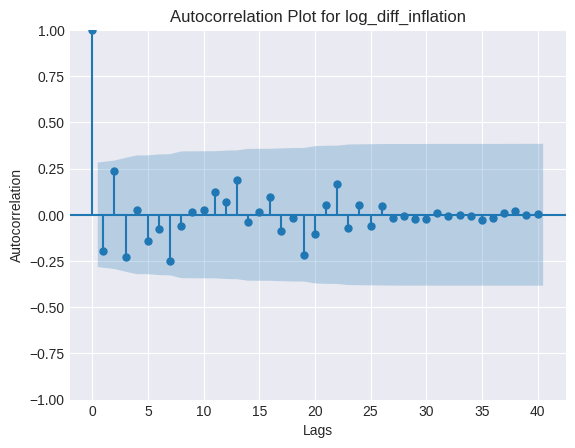

In [97]:
# Autocorrelation Plot for log_diff_temperature
plt.figure(figsize=(7,5))
plot_acf(df['log_diff_temperature'], lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for log_diff_temperature')
plt.grid(True)
plt.show()

# Autocorrelation Plot for log_diff_inflation
plt.figure(figsize=(7,5))
plot_acf(df['log_diff_inflation'], lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for log_diff_inflation')
plt.grid(True)
plt.show()

#### VAR Model
- The variable **log_diff_unitboxes shows statistically significant relationships with its own past values and with past temperature changes**, indicating that both its own history and temperature fluctuations play a role in its behavior.  
- The variables **log_diff_temperature and log_diff_inflation do not exhibit statistically significant relationships with any of the explanatory variables**, suggesting that their changes are not strongly influenced by the factors considered in this model.

In [98]:
# Select the relevant columns for the VAR model
var_data = df[['log_diff_unitboxes', 'log_diff_temperature', 'log_diff_inflation']]
var_data.dropna(inplace=True)

# VAR Model Estimation
VAR_model = VAR(var_data)
VAR_results = VAR_model.fit()
print(VAR_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Sep, 2024
Time:                     01:04:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.0796
Nobs:                     47.0000    HQIC:                  -11.3742
Log likelihood:           83.4016    FPE:                9.62872e-06
AIC:                     -11.5520    Det(Omega_mle):     7.53618e-06
--------------------------------------------------------------------
Results for equation log_diff_unitboxes
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.005307         0.011954            0.444           0.657
L1.log_diff_unitboxes          -0.303783         0.141892           -2.141           0.032
L1.log_

##### Granger Causality Test

In [99]:
## The p-values for both lag 1 and lag 2 are below 0.05
## leading us to reject the null hypothesis and conclude that log_diff_temperature Granger-causes log_diff_unitboxes at both lags.

print("\n log_diff_unitboxes vs log_diff_temperature")
print(grangercausalitytests(df[['log_diff_unitboxes', 'log_diff_temperature']], maxlag = 2))

## The p-values for both lag 1 and lag 2 are above 0.05,
## leading us to fail to reject the null hypothesis and conclude that log_diff_inflation does not Granger-cause log_diff_unitboxes at either lag.

print("\n log_diff_unitboxes vs log_diff_inflation")
print(grangercausalitytests(df[['log_diff_unitboxes', 'log_diff_inflation']], maxlag = 2))


 log_diff_unitboxes vs log_diff_temperature

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.7538  , p=0.0050  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=9.3506  , p=0.0022  , df=1
likelihood ratio test: chi2=8.5279  , p=0.0035  , df=1
parameter F test:         F=8.7538  , p=0.0050  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.2740  , p=0.0005  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=20.8100 , p=0.0000  , df=2
likelihood ratio test: chi2=17.1677 , p=0.0002  , df=2
parameter F test:         F=9.2740  , p=0.0005  , df_denom=41, df_num=2
{1: ({'ssr_ftest': (8.753755532680207, 0.004957810988900713, 44.0, 1), 'ssr_chi2test': (9.350602500817493, 0.002229121759981064, 1), 'lrtest': (8.527930549292108, 0.0034973714374641456, 1), 'params_ftest': (8.753755532680211, 0.004957810988900713, 44.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x78a0370455a0>, <sta

##### Forecast

In [101]:
# Step 1: Forecast the Next 5 Periods
forecast_horizon = 5
var_forecast = VAR_results.forecast(var_data.values[-VAR_results.k_ar:], steps=forecast_horizon)

# Convert the forecast to a DataFrame
forecast_df = pd.DataFrame(var_forecast, columns=['log_diff_unitboxes', 'log_diff_temperature', 'log_diff_inflation'])

In [102]:
# Step 2: Reverse the Transformations
# Get the last known log values of sales and temperature
last_log_sales_value = df['log_sales_unitboxes'].iloc[-1]

# Initialize the forecasted log sales values starting with the last known log value
forecast_log_sales = [last_log_sales_value]

# Revert the differencing by cumulatively summing the predicted differences
for diff in forecast_df['log_diff_unitboxes']:
    forecast_log_sales.append(forecast_log_sales[-1] + diff)

# Convert the log values back to the original scale of sales_unitboxes
forecast_sales = np.exp(forecast_log_sales[1:])  # Exclude the first value as it's the last observed

# Create a Date Range for Forecasted Values
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_horizon + 1, freq='M')[1:]

# Create a DataFrame for plotting the forecast in original scale
forecast_sales_df = pd.DataFrame(forecast_sales, index=forecast_index, columns=['Forecast'])

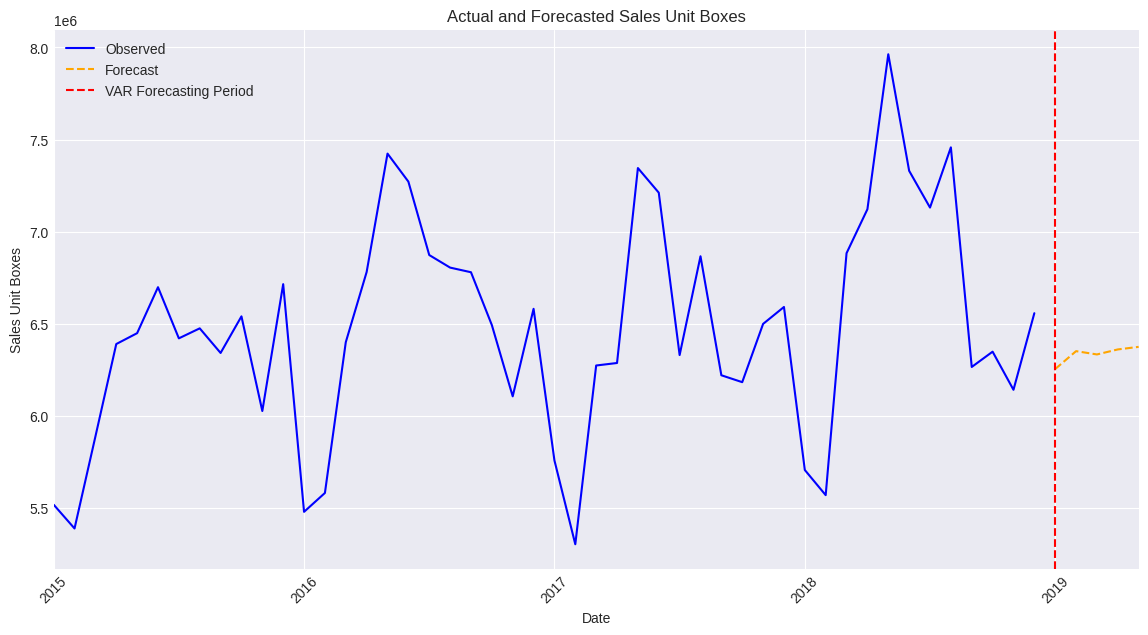

In [103]:
# Step 3: Plot the Actual and Forecasted Sales
plt.figure(figsize=(14, 7))

# Plot the actual sales_unitboxes data
df['sales_unitboxes'].plot(label='Observed', color='blue')

# Plot the forecasted sales_unitboxes values
forecast_sales_df['Forecast'].plot(label='Forecast', color='orange', linestyle='--')

# Highlight the forecast period
plt.axvline(x=forecast_index[0], color='r', linestyle='--', label='VAR Forecasting Period')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales Unit Boxes')
plt.title('Actual and Forecasted Sales Unit Boxes')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### *Model Comparison*

In [104]:
# Extract AIC values from the models
arma_aic = best_arma_model.aic
arima_aic = best_arima_model.aic
sarima_aic = best_sarima_model.aic
var_aic = VAR_results.aic

# Create a DataFrame to compare AIC values
model_comparison = pd.DataFrame({
    'Model': ['ARMA', 'ARIMA', 'SARIMA', 'VAR'],
    'AIC': [arma_aic, arima_aic, sarima_aic, var_aic]
})

model_comparison

,Model,AIC
0,ARMA,-100.055523
1,ARIMA,-87.206288
2,SARIMA,-115.743023
3,VAR,-11.551999


## **Conclusions**

1. **The SARIMA model provides the best fit for forecasting sales unit boxes**. This is evidenced by its lowest AIC value (-115.74) compared to other models like ARMA and ARIMA, indicating it captures the data patterns more effectively. The significant coefficients further support this model choice.

2. **Sales unit boxes are significantly influenced by their own past values**. In the VAR model, the log-differenced sales unit boxes show a statistically significant relationship with their own lagged values (p-value = 0.032), suggesting that past sales trends are relevant in predicting future sales.

3. **Temperature changes positively impact sales unit boxes and have predictive power over sales trends**. In the VAR model, the coefficient for lagged temperature changes is positive and statistically significant (p-value = 0.005). Granger causality tests further confirm that past temperature changes Granger-cause changes in sales, with significant p-values (0.005 for one lag, 0.0005 for two lags).

4. **Inflation rate does not have a statistically significant impact on sales unit boxes**. Despite a negative coefficient for lagged inflation, the p-value is high (0.299), indicating that inflation is not a significant predictor in this model.

5. **The SARIMA forecast shows a clear upward trend in sales unit boxes for early 2019**. The forecast indicates a gradual increase, with sales reaching above 7 million boxes by May 2019. The confidence intervals suggest some uncertainty but remain within a plausible range.

6. **The VAR model forecast is relatively stable with a slight upward trend**. This model forecasts sales unit boxes hovering around 6.3 to 6.4 million, showing less variability compared to the SARIMA model, which could indicate a more conservative forecast approach.


## **Recommendation**

**Adjust inventory and marketing strategies in anticipation of seasonal temperature variations to maximize sales.** Since the analysis shows that temperature positively influences sales, it is essential for the business to monitor and forecast weather patterns closely. During warmer periods, particularly when temperatures are expected to rise, increase marketing efforts and adjust inventory levels accordingly to meet the anticipated demand. This approach ensures that the company can capitalize on sales opportunities driven by favorable weather conditions, thereby optimizing inventory management and reducing the risk of stockouts or excess inventory (Tran, 2022).


## **References**
- Tableau. (2024). Time Series Analysis: Definition, Types, Techniques, and When It's Used. Retrieved from Tableau: https://www.tableau.com/learn/articles/time-series-analysis
- Tran, Bridgette. (2022, August 22). The Impact of Weather on Retail Sales. SF Fed; San Francisco Fed. https://www.frbsf.org/research-and-insights/publications/economic-letter/2022/08/impact-of-weather-on-retail-sales/
- sigma. (2024). Time Series Analysis Explained. Retrieved from sigma: https://www.sigmacomputing.com/resources/learn/what-is-time-series-analysis
- HEX TECH. (2023, December). Understanding the Importance of Stationarity in Time Series. Retrieved from hex.tech: https://hex.tech/blog/stationarity-in-time-series/
- Timescale. (2024, June 17). Stationary Time-Series Analysis. Retrieved from timescale: https://www.timescale.com/learn/stationary-time-series-analysis

